In [46]:
import pandas as pd
import numpy as np
from IPython.display import FileLink
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [8]:
train = pd.read_json('./data/lesson_2_HW_Kaggle/train.json')
train.head()

band_1  \
0  [-27.878361, -27.15416, -28.668615, -29.537971...   
1  [-12.242375, -14.920305, -14.920363, -12.66633...   
2  [-24.603676, -24.603714, -24.871029, -23.15277...   
3  [-22.454607, -23.082819, -23.998013, -23.99805...   
4  [-26.006956, -23.164886, -23.164886, -26.89116...   

                                              band_2        id inc_angle  \
0  [-27.154118, -29.537888, -31.0306, -32.190483,...  dfd5f913   43.9239   
1  [-31.506321, -27.984554, -26.645678, -23.76760...  e25388fd   38.1562   
2  [-24.870956, -24.092632, -20.653963, -19.41104...  58b2aaa0   45.2859   
3  [-27.889421, -27.519794, -27.165262, -29.10350...  4cfc3a18   43.8306   
4  [-27.206915, -30.259186, -30.259186, -23.16495...  271f93f4   35.6256   

   is_iceberg  
0           0  
1           0  
2           1  
3           0  
4           0

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1604 entries, 0 to 1603
Data columns (total 5 columns):
band_1        1604 non-null object
band_2        1604 non-null object
id            1604 non-null object
inc_angle     1604 non-null object
is_iceberg    1604 non-null int64
dtypes: int64(1), object(4)
memory usage: 75.2+ KB


In [10]:
train.describe()

is_iceberg
count  1604.000000
mean      0.469451
std       0.499222
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000

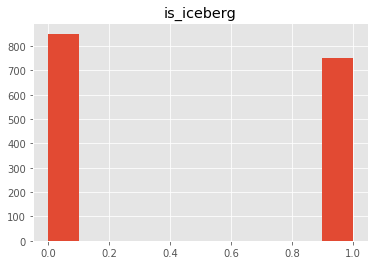

In [11]:
# Balanced dataset of icebergs and ships
train.hist();

### Turn numeric fields numeric

In [12]:
train['inc_angle'] = pd.to_numeric(train['inc_angle'],errors='coerce')
train['is_iceberg'] = pd.to_numeric(train['is_iceberg'],errors='coerce')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1604 entries, 0 to 1603
Data columns (total 5 columns):
band_1        1604 non-null object
band_2        1604 non-null object
id            1604 non-null object
inc_angle     1471 non-null float64
is_iceberg    1604 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 75.2+ KB


### Explore Bands and Transform to Images

In [13]:
len(train.band_1[0])

5625

In [14]:
len(train.band_2[0])

5625

In [15]:
len(train.band_1[100])

5625

In [16]:
len(train.band_2[100])

5625

#### [Data Background](https://www.kaggle.com/c/statoil-iceberg-classifier-challenge/data)

Band data is in a 1D list of length 5625, and we know the images are supposed to be 75x75. Let's take a random sample of iceburgs and ships to plot

In [17]:
icebergs = train[train.is_iceberg==1].sample(n=6)
ships = train[train.is_iceberg==0].sample(n=6)

#### Icebergs: Band_1

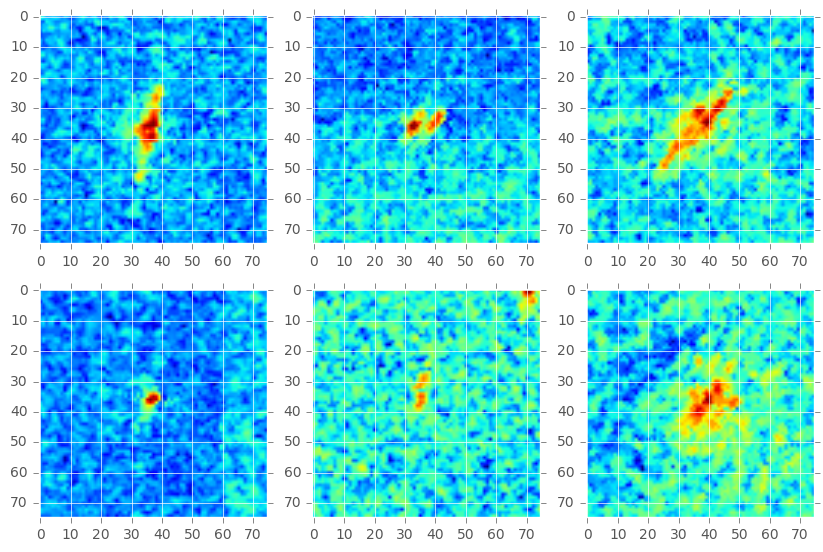

In [12]:
# Plot band_1 for iceburgs
band = 0
fig = plt.figure(1,figsize=(10,10))
for i in range(6):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(icebergs.iloc[i,band]),(75,75))
    ax.imshow(arr)

#### Ships: Band_1

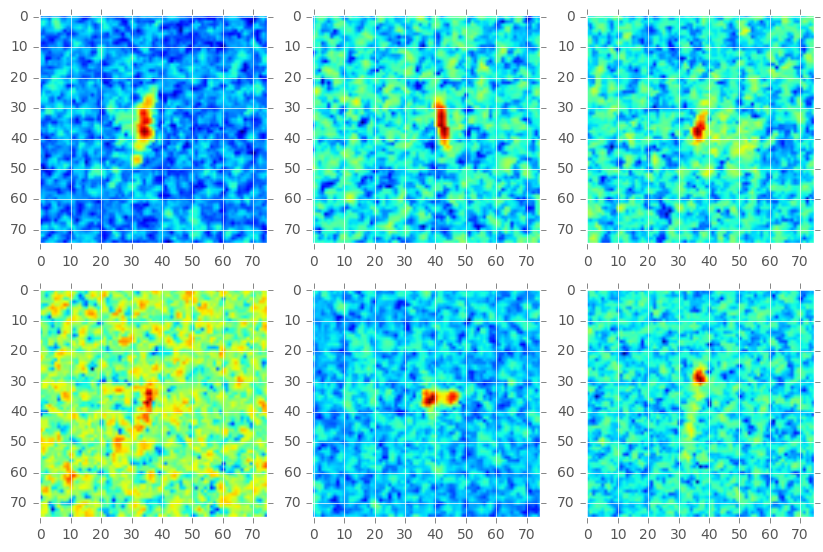

In [13]:
# Plot band_1 for ships
band = 0
fig = plt.figure(1,figsize=(10,10))
for i in range(6):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(ships.iloc[i,band]),(75,75))
    ax.imshow(arr)

#### Icebergs: Band_2

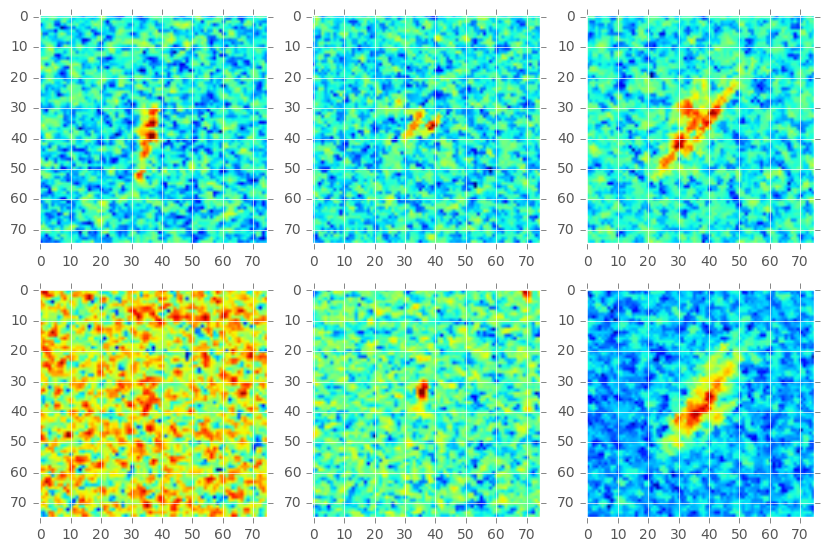

In [14]:
# Plot band_2 for iceburgs
band = 1
fig = plt.figure(1,figsize=(10,10))
for i in range(6):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(icebergs.iloc[i,band]),(75,75))
    ax.imshow(arr)

#### Ships: Band_2

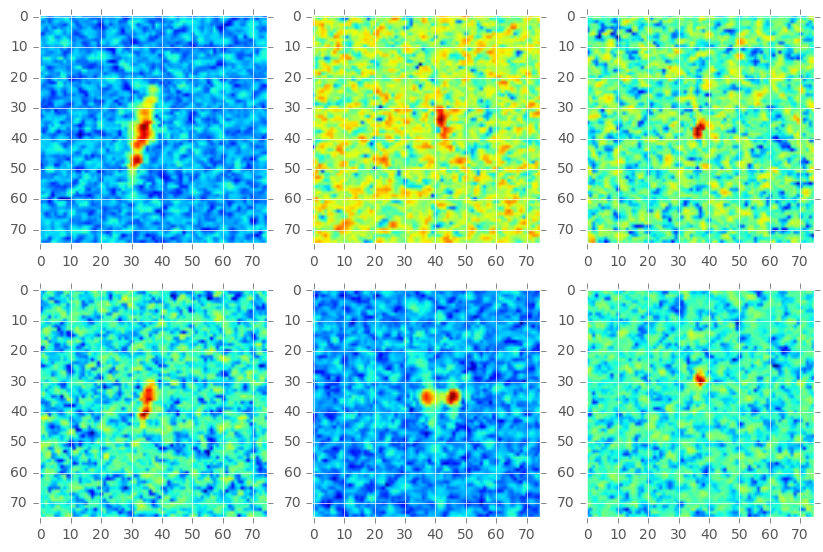

In [15]:
# Plot band_2 for ships
band = 1
fig = plt.figure(1,figsize=(10,10))
for i in range(6):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(ships.iloc[i,band]),(75,75))
    ax.imshow(arr)

### Plot with a Gradient Magnitude filter applied
This filter defines edges

In [16]:
from scipy import signal

xder = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
yder = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

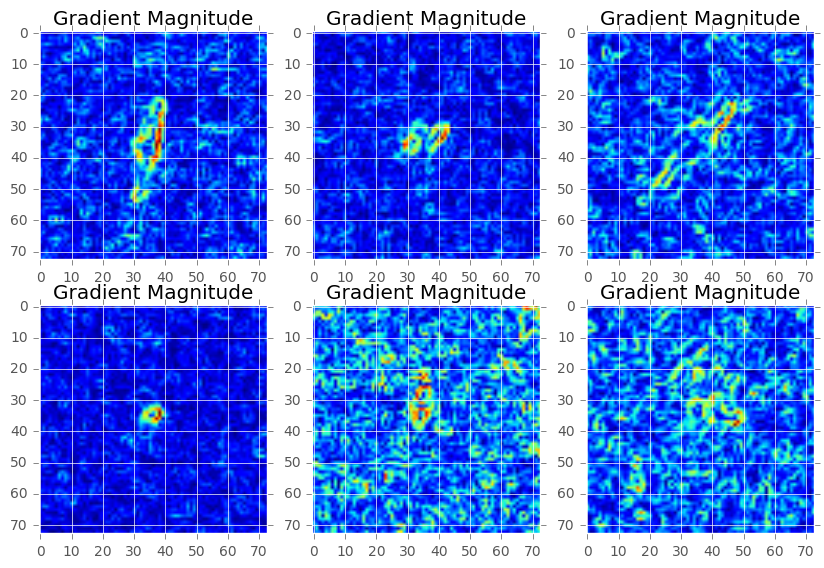

In [17]:
# Plot band_1 for icebergs
fig = plt.figure(1,figsize=(10,10))
for i in range(6):
    ax = fig.add_subplot(3,3,i+1)
    arrx = signal.convolve2d(np.reshape(np.array(icebergs.iloc[i,0]),(75,75)),xder,mode='valid')
    arry = signal.convolve2d(np.reshape(np.array(icebergs.iloc[i,0]),(75,75)),yder,mode='valid')
    ax.imshow(np.hypot(arrx,arry))
    ax.set_title('Gradient Magnitude')
    
plt.show()

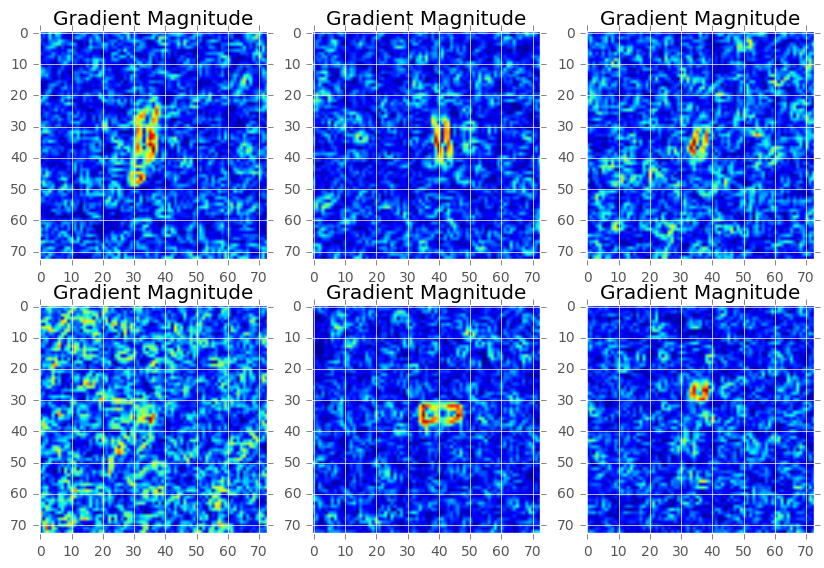

In [18]:
# Plot band_1 for ships
fig = plt.figure(1,figsize=(10,10))
for i in range(6):
    ax = fig.add_subplot(3,3,i+1)
    arrx = signal.convolve2d(np.reshape(np.array(ships.iloc[i,0]),(75,75)),xder,mode='valid')
    arry = signal.convolve2d(np.reshape(np.array(ships.iloc[i,0]),(75,75)),yder,mode='valid')
    ax.imshow(np.hypot(arrx,arry))
    ax.set_title('Gradient Magnitude')
    
plt.show()

## Export arrays to PNGs so we can setup subdirs to use Keras

In [83]:
from PIL import Image
import numpy as np

In [20]:
# 75x75 pixel == 5625 pixels
np.array(icebergs.iloc[0,0]).shape

(5625,)

In [ ]:
icebergs = train[train.is_iceberg==1]
ships = train[train.is_iceberg==0]

In [28]:
icebergs.head()

band_1  \
1460  [-24.066139, -22.665459, -23.851814, -24.51181...   
318   [-17.67308, -15.940391, -20.755123, -20.285553...   
47    [-25.822117, -24.994314, -25.261593, -26.11668...   
765   [-24.453146, -22.465454, -22.86957, -22.270355...   
1118  [-20.427303, -21.949158, -23.135489, -21.41181...   

                                                 band_2        id  inc_angle  \
1460  [-22.665382, -24.286121, -30.086891, -26.28025...  3f6778c5    33.6523   
318   [-25.032618, -25.299948, -22.733629, -21.42364...  7b489754    40.3904   
47    [-23.543251, -24.994314, -26.116634, -26.73736...  b7e6b182    40.7118   
765   [-24.208458, -26.707232, -23.513264, -25.79217...  56f59b5b    40.7177   
1118  [-27.432262, -26.143154, -26.448004, -30.28576...  6b3e62d4    40.3726   

      is_iceberg  
1460           1  
318            1  
47             1  
765            1  
1118           1

In [137]:
# play around and combine the bands and export to RGB pngs
def combine_channels_to_img(df, class_name, export_path, img_size=(75,75,3)):
    band1 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in df["band_1"]])
    band2 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in df["band_2"]])
    band3 = np.mean([band1,band2], axis=0)
    bands = np.stack((band1, band2, band3))
    bands = bands.transpose(1,2,3,0)
    img = Image.fromarray(bands[0], mode='RGB')
    img.save(export_path+class_name+'.png')


In [138]:
combine_channels_to_img(train, 'test', './')

[[[226   6 223]
  [193 162  59]
  [217 193  66]
  ..., 
  [ 54  93 209]
  [193  13  64]
  [248 193 162]]

 [[206 228 193]
  [202  90 229]
  [193 180 190]
  ..., 
  [ 77 255 193]
  [156  80 236]
  [193 159  87]]

 [[  3 194 237]
  [127 249 193]
  [128  37   9]
  ..., 
  [232 193 247]
  [ 63   2 194]
  [ 94  32   6]]

 ..., 
 [[208 186 252]
  [193 104  89]
  [229 193  28]
  ..., 
  [120  93 209]
  [193 157  19]
  [220 193 138]]

 [[184 214 193]
  [ 32 220 193]
  [193 104  79]
  ..., 
  [  9 215 193]
  [ 84 225 195]
  [193 184  31]]

 [[  6 194  98]
  [ 16 232 193]
  [ 12  81 236]
  ..., 
  [223 193 110]
  [222 242 193]
  [131  82 236]]]


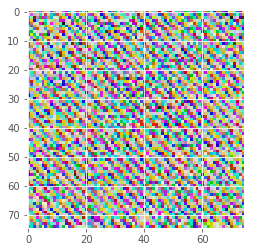

In [142]:
# Obviously feeding in negative numbers which do not map to the RGB scale and forcing them to RGB is not what we want
# but hey, it's displaying at the correct size
# print(np.asarray(Image.open('./test.png')))
plt.imshow(np.asarray(Image.open('./test.png')));

### Try using ResNet and an XGBoossted final layer for classification

Based on the code at:
https://www.kaggle.com/cttsai/feature-extraction-by-resnet-keras/code

In [2]:
from tqdm import tqdm
#
import numpy as np # linear algebra
import pandas as pd # data processing
import datetime as dt
#import for image processing
import cv2
from keras.applications import ResNet50
#evaluation
from sklearn.model_selection import train_test_split
import xgboost as xgb

Using Theano backend.
Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Ran statoil_resnet_xgb.py in terminal

In [22]:
resnet_xgb_df = pd.read_csv('./data/lesson_2_HW_Kaggle/statoil_subm_2017-12-11-22-55_xgb.csv')
resnet_xgb_df.head()

id  is_iceberg
0  5941774d    0.494032
1  4023181e    0.550251
2  b20200e4    0.011835
3  e7f018bb    0.456660
4  4371c8c3    0.953128

Min estimate: 0.000052
Max estimate: 0.998187


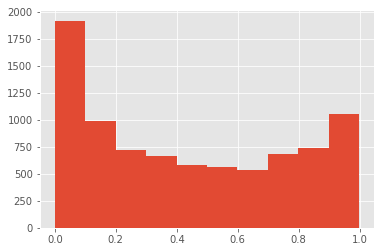

In [53]:
print("Min estimate: {:6f}".format(np.min(resnet_xgb_df['is_iceberg'])))
print("Max estimate: {:6f}".format(np.max(resnet_xgb_df['is_iceberg'])))
resnet_xgb_df['is_iceberg'].hist();

This model looks way too confident!  
#### The model is PAINFULLY OVERFITTING to the training data, hence the 4% Train LogLoss and the 30% Validation LogLoss

#### Train/Validation scores:

100%|██████████████████████████| 1604/1604 [13:42<00:00,  1.95it/s]  
100%|██████████████████████████| 8424/8424 [1:07:02<00:00,  2.09it/s]  
evaluating performance...  
splitted: (1443, 2049), (161, 2049)  
[0]	train-logloss:0.678859	valid-logloss:0.680483  
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.  
  
Will train until valid-logloss hasn't improved in 100 rounds.  
[50]	train-logloss:0.356222	valid-logloss:0.409301  
[100]	train-logloss:0.236667	valid-logloss:0.347612  
[150]	train-logloss:0.163852	valid-logloss:0.332697  
[200]	train-logloss:0.113526	valid-logloss:0.320865  
[250]	train-logloss:0.082171	valid-logloss:0.313147  
[300]	train-logloss:0.058324	valid-logloss:0.308944  
[350]	train-logloss:0.042428	valid-logloss:0.30435  
[400]	train-logloss:0.032486	valid-logloss:0.307313  
[450]	train-logloss:0.025406	valid-logloss:0.306033  
Stopping. Best iteration:  
[358]	train-logloss:0.040696	valid-logloss:0.304037

In [45]:
from IPython.display import FileLink
FileLink('./data/lesson_2_HW_Kaggle/statoil_subm_2017-12-11-22-55_xgb.csv')

/home/ubuntu/courses/deeplearning1/nbs/data/lesson_2_HW_Kaggle/statoil_subm_2017-12-11-22-55_xgb.csv

### Create train and valid folders so Keras can read format

In [21]:
!pwd

/home/ubuntu/courses/deeplearning1/nbs


In [23]:
import os
os.getcwd()

'/home/ubuntu/courses/deeplearning1/nbs'

In [31]:
path = os.getcwd()+'/data/lesson_2_HW_Kaggle/'
path

'/home/ubuntu/courses/deeplearning1/nbs/data/lesson_2_HW_Kaggle/'

In [27]:
import make_train_val as mtv

In [32]:
# let's use the utils image bacth processing tool Fast-AI provided 
??get_data

In [33]:
val_data = get_data(path+'valid')
trn_data = get_data(path+'train')

### Let's just run these through our VGG model to see performance without considering the incidence angle

In [28]:
import utils; reload(utils)
from utils import *

%matplotlib inline
from __future__ import division, print_function
import os, json
from glob import glob
import numpy as np
import scipy
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import utils; reload(utils)
from utils import plots, get_batches, plot_confusion_matrix, get_data

from numpy.random import random, permutation
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential
from keras.layers import Input
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop
from keras.preprocessing import image

In [26]:
from vgg16 import Vgg16
vgg = Vgg16()
model = vgg.model

In [29]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [30]:
# Remove the last layer of the NN model so we can train on our two classes (iceberg or ship) 
# instead of the original 1000
model.pop()
for layer in model.layers: 
    layer.trainable=False

In [31]:
# Create the last fully connected layer 
model.add(Dense(2, activation='softmax'))

In [ ]:
# create batch data
gen=image.ImageDataGenerator()
batches = gen.flow(trn_data, trn_labels, batch_size=batch_size, shuffle=True)
val_batches = gen.flow(val_data, val_labels, batch_size=batch_size, shuffle=False)